# Subaru Sakashita

## Research question/interests

From the data, since I grew up in Japan, I wanna look at what games are popular in Japan. I am also curious in how people's preference in video games differ depending on region. I am pretty sure some regions have similar preference so I will do an analysis on which regions have similar preference, and which regions do not. Thirdly, I want to look at what kinds of games have contributed to the global sales in each major platform. And lastly, I will be looking at how the trend changes for each platform. 

What games are popular in Japan?

To what extent is people's preference similar?

What type of games contributed to global sales in each major platform?

What is the general trend for each platform?

In [1]:
import pandas as pd
d = pd.read_csv('../data/raw/Video_Games.csv');
d

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN



## Clean up 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables
df_cleaned = d.copy()
df_cleaned = df_cleaned.copy().drop(['Critic_Count','User_Score','Rating','User_Count'], axis=1) #getting ride of crisitc_count, user_score, rating, and user_count rows
df_cleaned = df_cleaned.dropna(axis=0) #remove rows with null 
df_cleaned = df_cleaned[df_cleaned['NA_Sales'] >= 0] #filter out NA sales less than 0
df_cleaned = df_cleaned[df_cleaned['EU_Sales'] >= 0] #filter out EU sales less than 0
df_cleaned = df_cleaned[df_cleaned['JP_Sales'] >= 0] #filter out JP sales less than 0
df_cleaned = df_cleaned[df_cleaned['Other_Sales'] >= 0] #filter out Other sales less than 0

df_cleaned



,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


## Analysis

<AxesSubplot:>

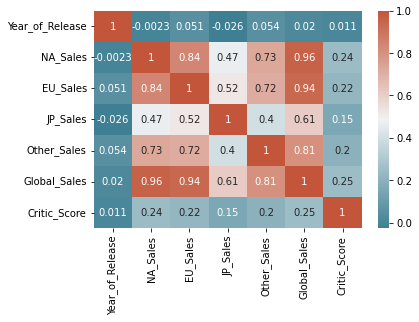

In [3]:
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

There is a positive correlation between sales in different regions. 
The graph also tells that Year of Release is negatively correlated with the sales. 

[Text(0.5, 1.0, 'Global Sales by Year of Release')]

<Figure size 1800x1080 with 0 Axes>

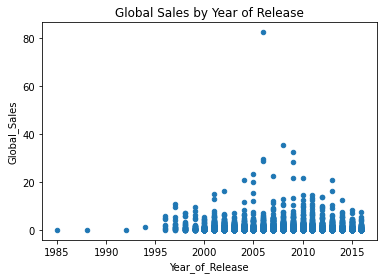

In [4]:
plt.figure(figsize=(25, 15))
df_cleaned.plot(kind='scatter', x='Year_of_Release', y='Global_Sales').set(title="Global Sales by Year of Release")

The scatterplot tells us that video games started to gain its popularity from 1995.
Many games have the global sales around 10~15 million. But there is one game that made a great sales of over 80 million. 

<Figure size 1440x720 with 0 Axes>

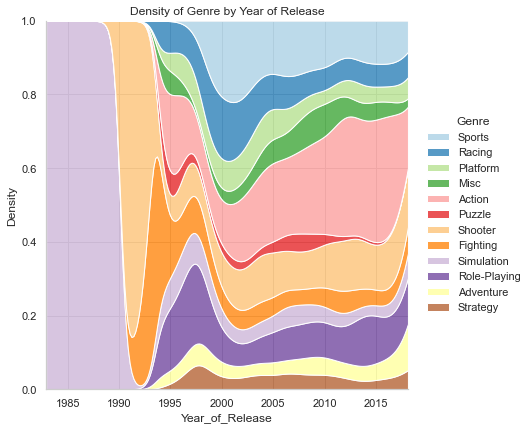

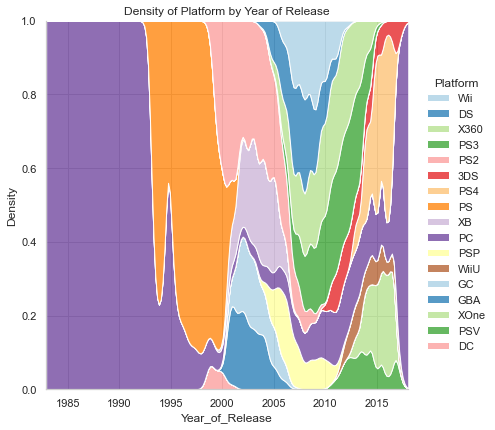

In [7]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 10))
sns.color_palette("Set2")
# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df_cleaned,
    x="Year_of_Release", hue="Genre",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette = "Paired"
).set(title="Density of Genre by Year of Release")
sns.displot(
    data=df_cleaned,
    x="Year_of_Release", hue="Platform",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette = "Paired"
).set(title="Density of Platform by Year of Release")

The graph shows that many action Sports games were produced in the late 1900s. And as the time passes, different kinds of
games started to release. 

This shows that PC games were released the earliest. Followed by PS.  PC games still exist today but some platforms no longer have any games release like PS and PSP. This could be used for determining the trend for each platform. 

<Figure size 1440x720 with 0 Axes>

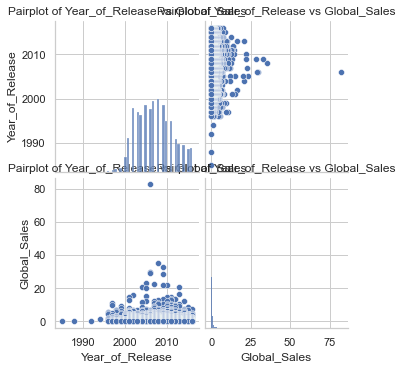

In [8]:
plt.figure(figsize=(20, 10))
dfpair=df_cleaned.drop(['Critic_Score','Other_Sales', 'JP_Sales','EU_Sales','NA_Sales'], axis=1)
sns.pairplot(dfpair).set(title="Pairplot of Year_of_Release vs Global_Sales")

Many games are published around 2000. But you can also see that the global sales of games are decreasing as year passes. 
This could be a trend for all the video games that the popularity is decreasing by year. 


[Text(0.5, 1.0, 'Number of games by Platform')]

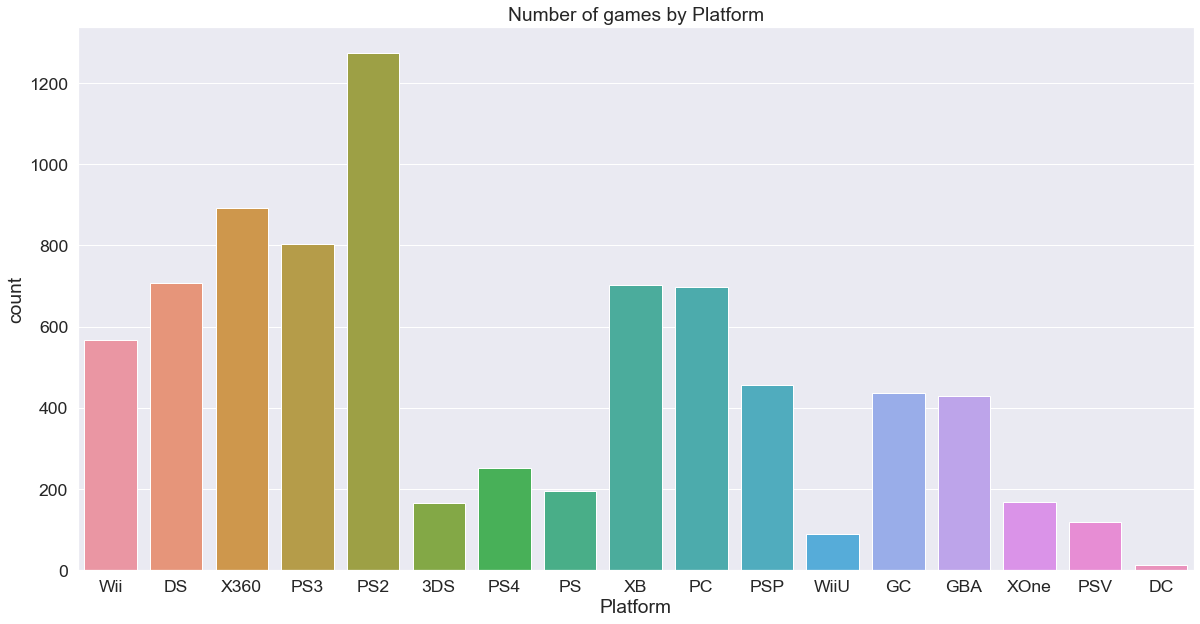

In [9]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
sns.countplot(x=df_cleaned["Platform"]).set(title="Number of games by Platform")

This graph shows that PS2 has the most number of games. 

[Text(0.5, 1.0, 'Number of Games by Genre in Nintendo')]

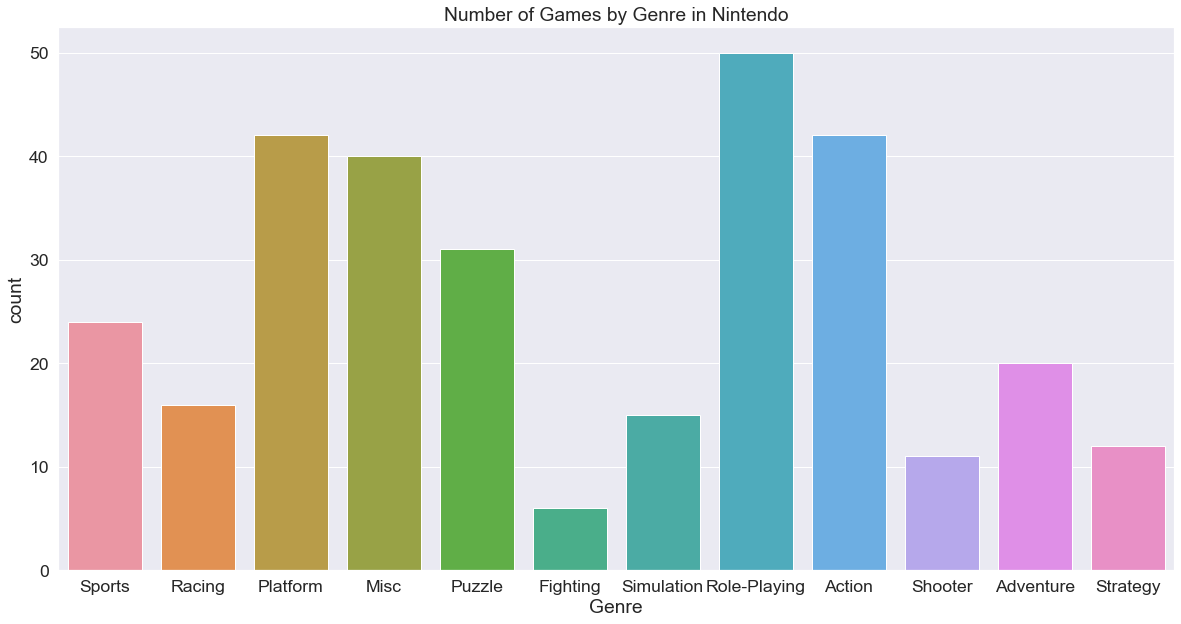

In [10]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
df2 = df_cleaned.copy()
df2 = df2[df2['Publisher'] == "Nintendo"]
df2
sns.countplot(x=df2["Genre"]).set(title="Number of Games by Genre in Nintendo")


I used to play nintendo games when I was a kid. So I looked at what type of genres has the most number of games in Nintendo. 
It turns out Role-Playing games has the most number of games. This is interesting

[Text(0.5, 1.0, 'Number of genres')]

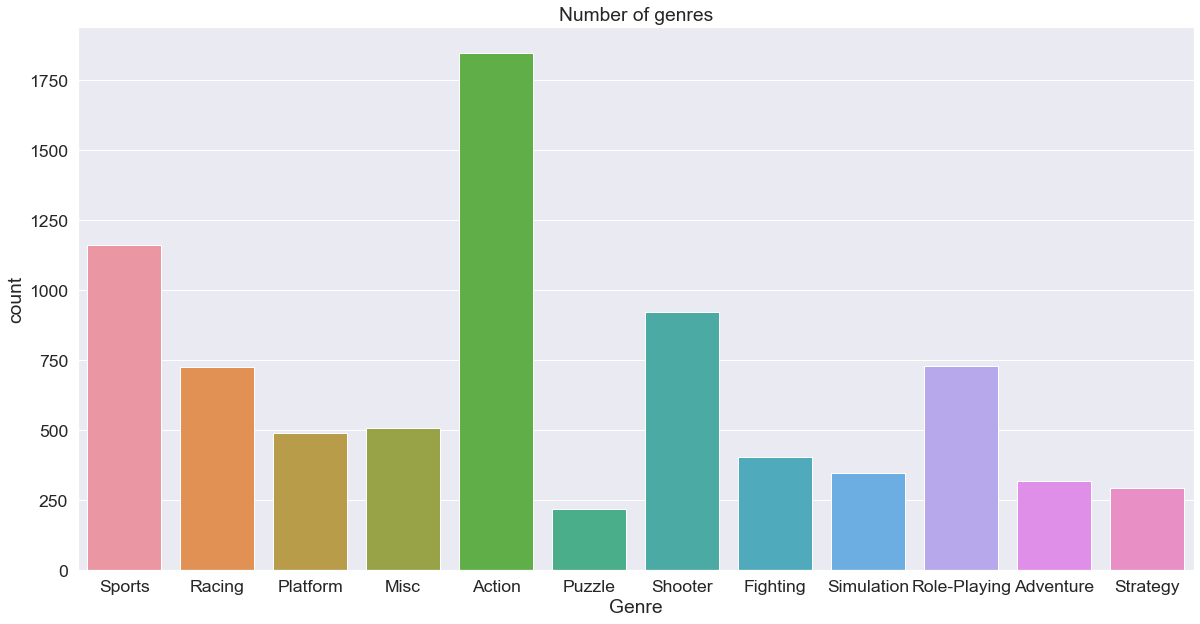

In [11]:
df2=df_cleaned.copy()
sns.set(font_scale=1.6)
plt.figure(figsize=(20, 10))
sns.countplot(x=df2["Genre"]).set(title="Number of genres")

The graph shows that action games were released the most overall. 

## Method Chaining

In [12]:
df = (  
    pd.read_csv("../data/raw/Video_Games.csv")
    .drop(['User_Count','Critic_Count', 'Rating','User_Score'], axis=1)
    .dropna(axis=0)
    .loc[lambda x: x['Global_Sales'] >= 0]
    .loc[lambda x: x['NA_Sales'] >= 0]
    .loc[lambda x: x['JP_Sales'] >= 0]
    .loc[lambda x: x['EU_Sales'] >= 0]
    .loc[lambda x: x['Other_Sales'] >= 0]
    
)

df.to_csv('processed_data_subaru.csv',index=False)

In [13]:
def load_and_process(path):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
        pd.read_csv(path)
        .loc[lambda x: x['Global_Sales'] >= 0]
        .loc[lambda x: x['NA_Sales'] >= 0]
        .loc[lambda x: x['JP_Sales'] >= 0]
        .loc[lambda x: x['EU_Sales'] >= 0]
        .loc[lambda x: x['Other_Sales'] >= 0]
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .drop(['User_Count','Critic_Count', 'Rating','User_Score'], axis=1)
          .dropna(axis=0)
      )

    # Make sure to return the latest dataframe

    return df2 

In [14]:
load_and_process("../data/raw/Video_Games.csv")

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


In [15]:
import project_functions1

df = project_functions1.load_and_process("../data/raw/Video_Games.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,Atomic Games
16701,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,Taito Corporation
16702,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01,48.0,Interchannel-Holon
16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01,60.0,SimBin


## Answering Questions

### Question 1: What game are popular in Japan?

[Text(0.5, 1.0, 'JP Sales by Year of Release')]

<Figure size 1440x720 with 0 Axes>

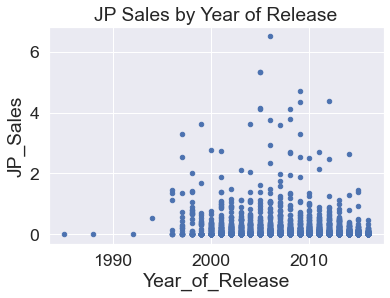

In [16]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
df.plot(kind='scatter', x='Year_of_Release', y='JP_Sales').set(title="JP Sales by Year of Release")

The scatter plot shows that there is a game that made over 6 million copies.So let's look into it. 

In [17]:
df2 = df.copy()
df2 = df2[df2['JP_Sales'] >= 4].reset_index()
df2

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Developer
0,6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,Nintendo
1,8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,Nintendo
2,11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,Nintendo
3,19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.74,9.20,4.16,2.04,20.15,77.0,Nintendo
4,26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.43,5.35,5.32,1.18,15.29,77.0,Nintendo
5,43,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.50,3.45,5.33,0.86,12.13,86.0,Nintendo
6,73,Animal Crossing: New Leaf,3DS,2012.0,Simulation,Nintendo,2.03,2.36,4.39,0.39,9.16,88.0,Nintendo
7,152,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,Nintendo,0.63,0.67,4.35,0.15,5.78,87.0,Level 5
8,163,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.55,4.13,0.34,5.48,81.0,Capcom


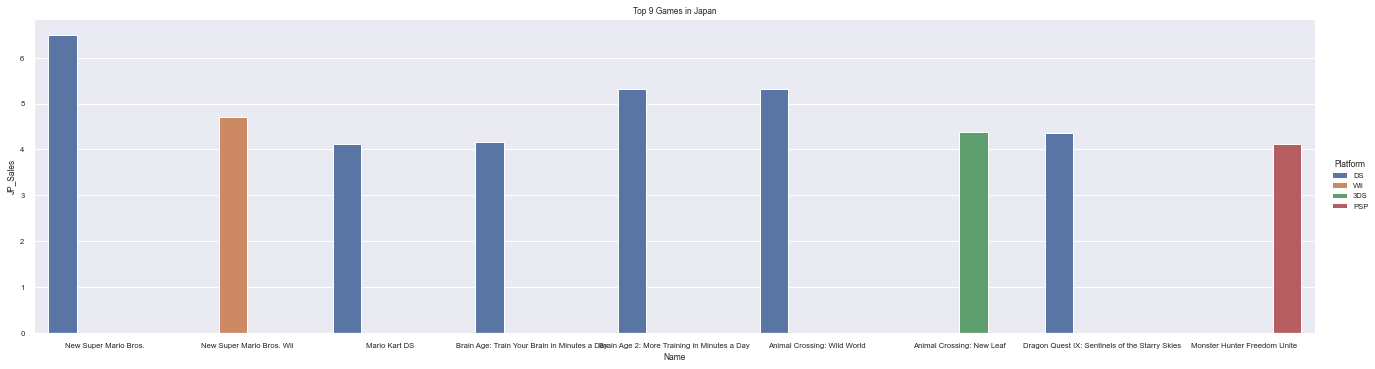

In [18]:
sns.set(font_scale=0.7)
sns.catplot(data=df2, x="Name", y="JP_Sales", kind="bar", hue="Platform", aspect=3.7).set(title="Top 9 Games in Japan")

It shows that Supermario bros was sold the most in Japan. The graph also shows the DS was quite popular in Japan. 

### Question 2: To what extent is people's preference similar?

Overall, action games and sports games were released the most for each platform. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables



In [20]:
dfcopy=df.copy()

In [21]:
dfcopy=dfcopy.groupby(["Genre"]).sum().reset_index()
dfcopy=dfcopy.drop(['Year_of_Release','Critic_Score'], axis=1)
dfcopy

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Action,621.70,400.77,77.66,150.71,1251.56
1,Adventure,46.24,29.27,9.20,8.92,93.75
2,Fighting,138.92,61.72,27.94,25.44,254.14
3,Misc,242.04,130.42,33.42,44.99,451.18
4,Platform,204.99,112.71,43.31,33.29,394.45
5,Puzzle,45.87,29.86,15.93,7.69,99.54
6,Racing,242.76,172.27,28.86,60.24,504.08
7,Role-Playing,220.62,119.43,122.99,40.48,503.35
8,Shooter,451.67,262.41,18.57,88.20,821.11
9,Simulation,98.03,70.24,28.82,18.15,215.18


<Figure size 1440x720 with 0 Axes>

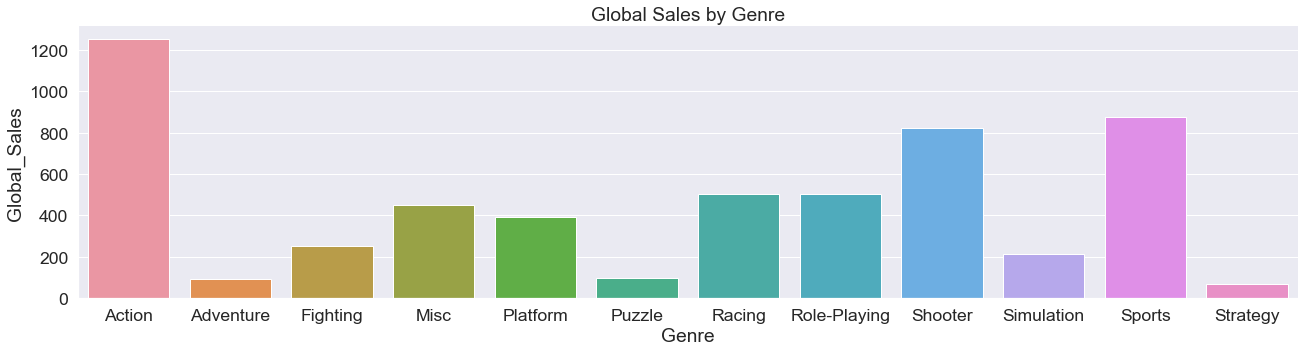

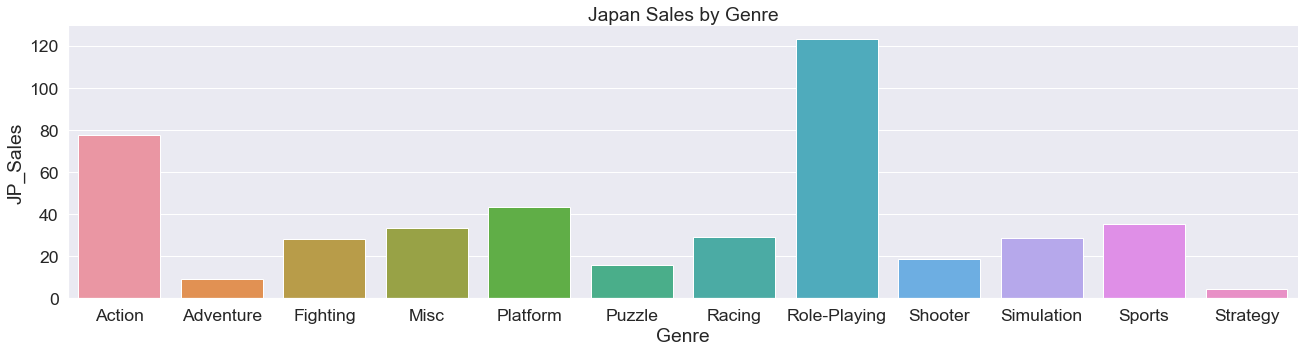

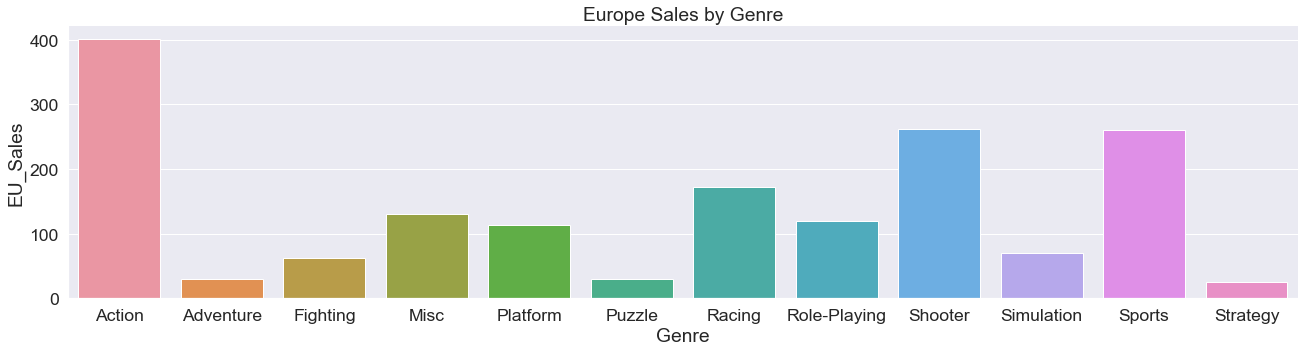

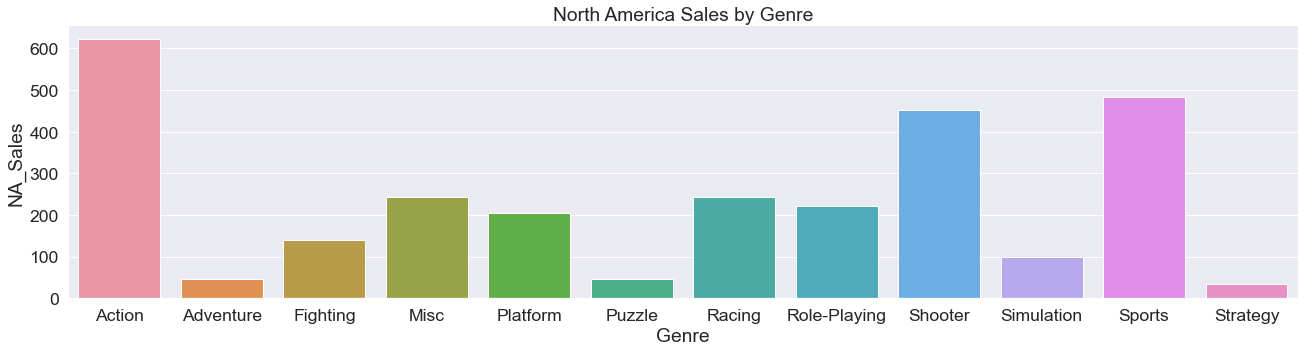

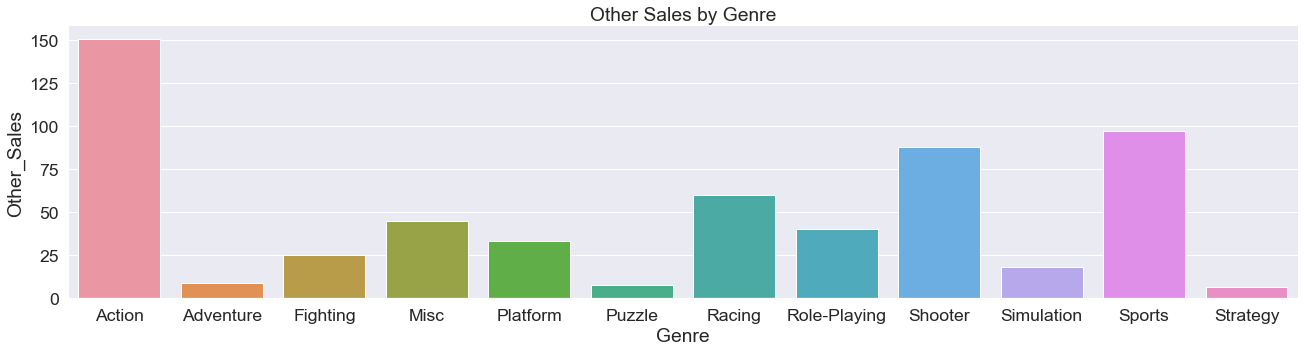

In [27]:

plt.figure(figsize=(20, 10))
sns.catplot(data=dfcopy, x="Genre", y="Global_Sales", kind="bar", aspect=3.7).set(title="Global Sales by Genre")
sns.catplot(data=dfcopy, x="Genre", y="JP_Sales", kind="bar", aspect=3.7).set(title="Japan Sales by Genre")
sns.catplot(data=dfcopy, x="Genre", y="EU_Sales", kind="bar", aspect=3.7).set(title="Europe Sales by Genre")
sns.catplot(data=dfcopy, x="Genre", y="NA_Sales", kind="bar", aspect=3.7).set(title="North America Sales by Genre")
sns.catplot(data=dfcopy, x="Genre", y="Other_Sales", kind="bar", aspect=3.7).set(title="Other Sales by Genre")

Globally speaking, action games are the most popular. But if look into it by different region, the results are quite interesting. In Japan, role playing games are the most popular. In other regions such as EU, NA, Other, they all prefered action games than any other games. 


## Question 3: What type of games contributed to global sales in each major platform?


To find an answer, we will plot a scatter diagram showing global sales of each platform.

[Text(0.5, 1.0, 'Number of games exist in each Platform'),
 Text(0, 0.5, 'Number of Games')]

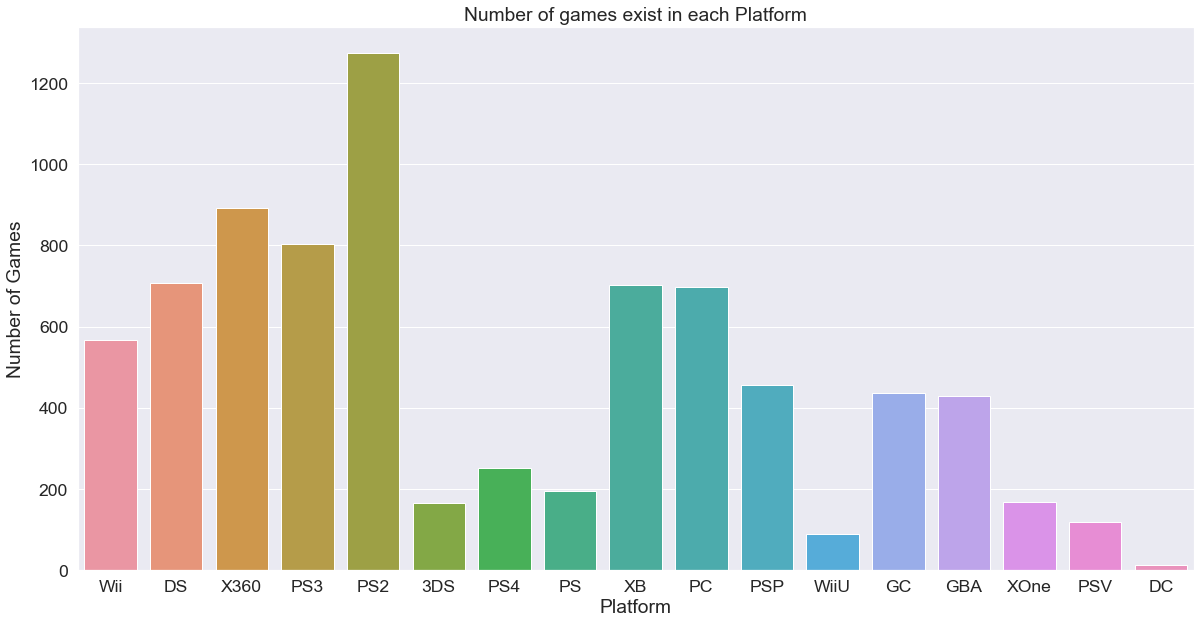

In [23]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
sns.countplot(x=df_cleaned["Platform"]).set(title="Number of games exist in each Platform",ylabel="Number of Games")

The graph exemplifies that the top five platforms are PS2,X360, DS, PS3 Wii. So for this question, we will consider these platforms as the major platform. 

<Figure size 1440x720 with 0 Axes>

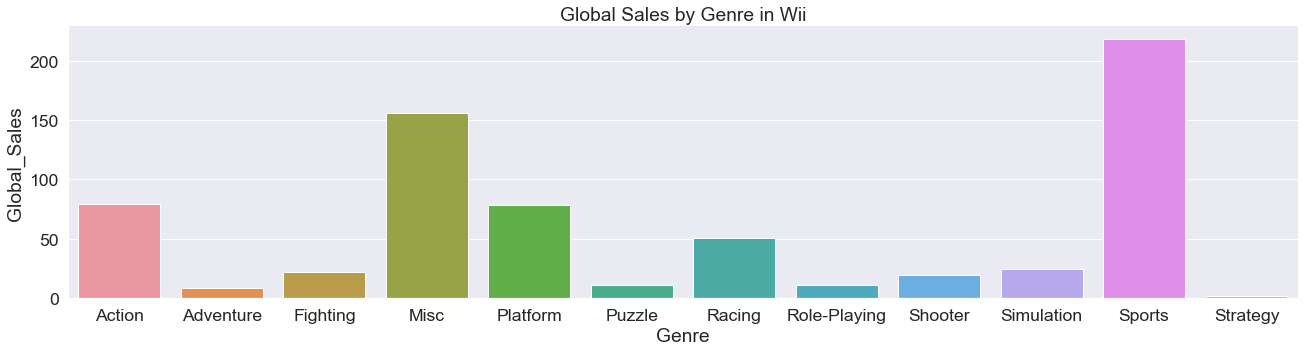

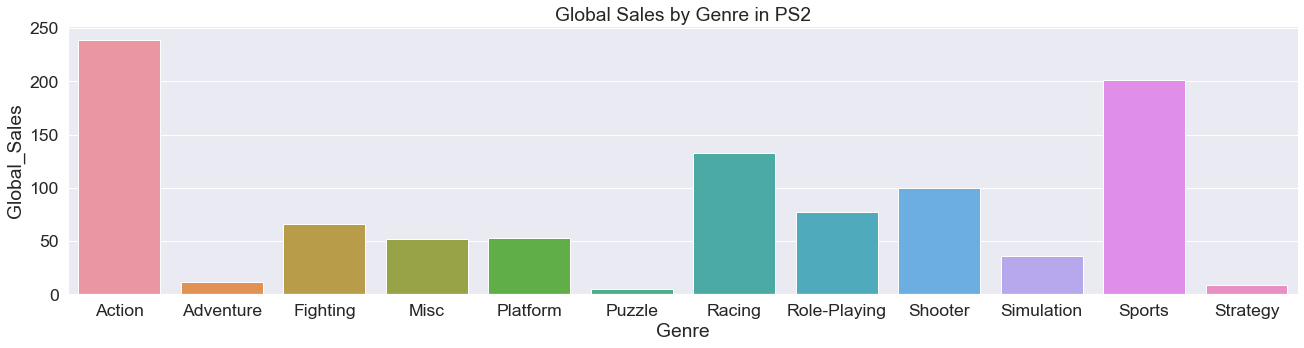

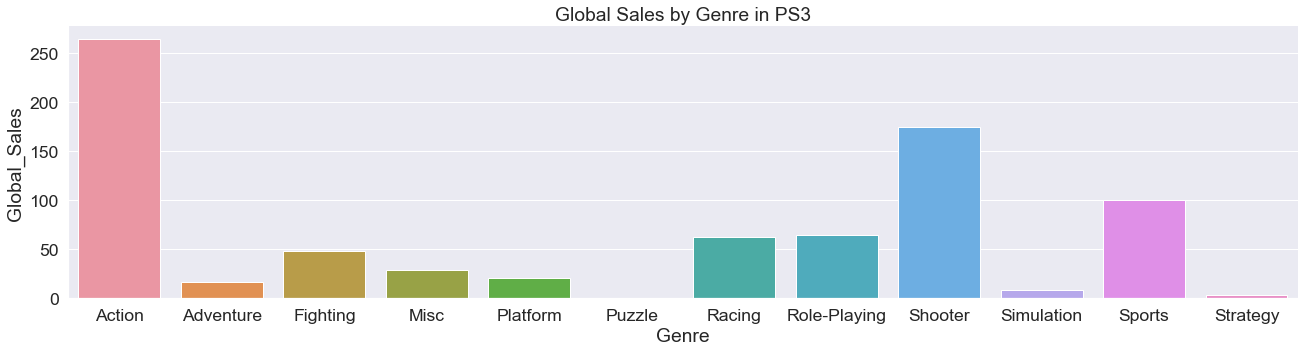

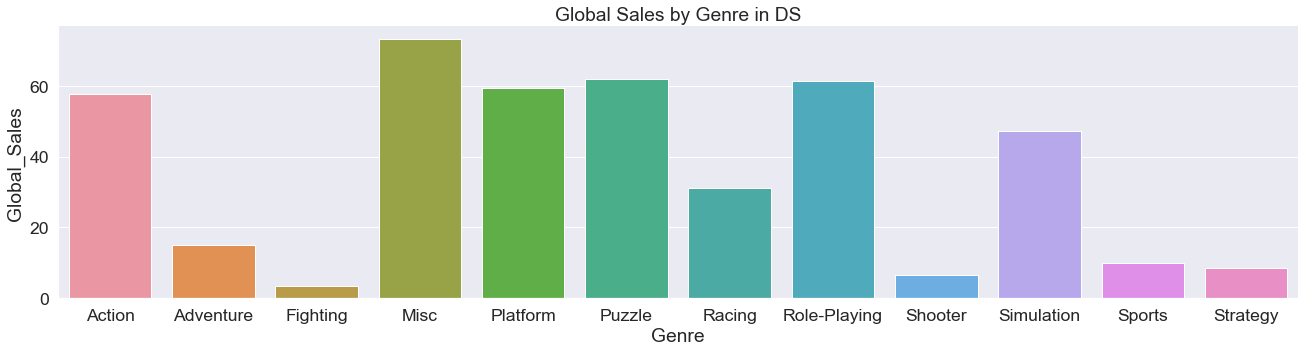

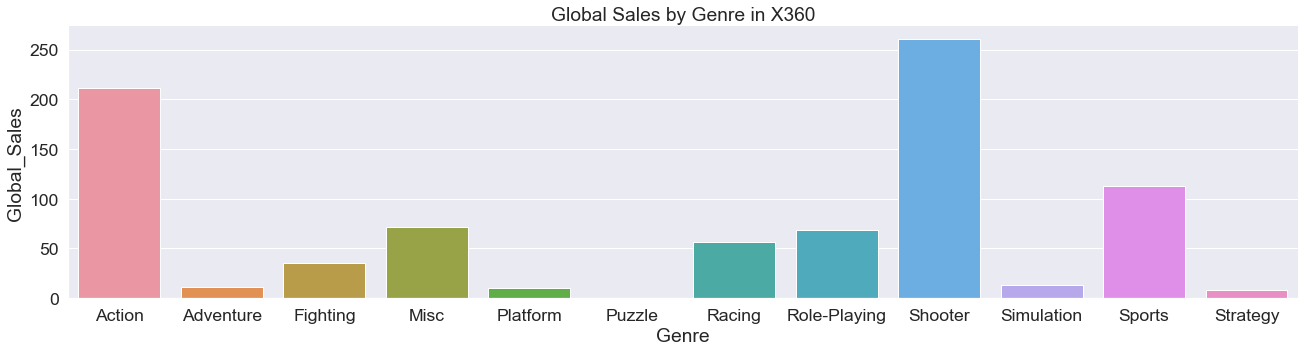

In [24]:
df2 = df_cleaned.copy()
## Filtering by Wii
df2 = df2[df2['Platform'] == "Wii"]
df2=df2.groupby(["Genre"]).sum().reset_index()

## Filtering by PS2
df3 = df_cleaned[df_cleaned['Platform']=="PS2"]
df3=df3.groupby(["Genre"]).sum().reset_index()

## Filtering by PS3
df4 = df_cleaned[df_cleaned['Platform']=="PS3"]
df4=df4.groupby(["Genre"]).sum().reset_index()

## Filtering by DS
df5 = df_cleaned[df_cleaned['Platform']=="DS"]
df5=df5.groupby(["Genre"]).sum().reset_index()

## Filtering by X360
df6 = df_cleaned[df_cleaned['Platform']=="X360"]
df6=df6.groupby(["Genre"]).sum().reset_index()

##Plot
plt.figure(figsize=(20, 10))
sns.catplot(data=df2, x="Genre", y="Global_Sales", kind="bar", aspect=3.7).set(title="Global Sales by Genre in Wii")
sns.catplot(data=df3, x="Genre", y="Global_Sales", kind="bar", aspect=3.7).set(title="Global Sales by Genre in PS2")
sns.catplot(data=df4, x="Genre", y="Global_Sales", kind="bar", aspect=3.7).set(title="Global Sales by Genre in PS3")
sns.catplot(data=df5, x="Genre", y="Global_Sales", kind="bar", aspect=3.7).set(title="Global Sales by Genre in DS")
sns.catplot(data=df6, x="Genre", y="Global_Sales", kind="bar", aspect=3.7).set(title="Global Sales by Genre in X360")


The following is the Genre that contribute the most in each major platform. 


| Platform | Genre | 
| ----- | ------ | 
| Wii| Sports    | 
| PS2 |Action| 
| PS3|Action| 
| DS| Misc   | 
| X360 |Shooter  | 




### Question 4: What is the general trend for each platform?


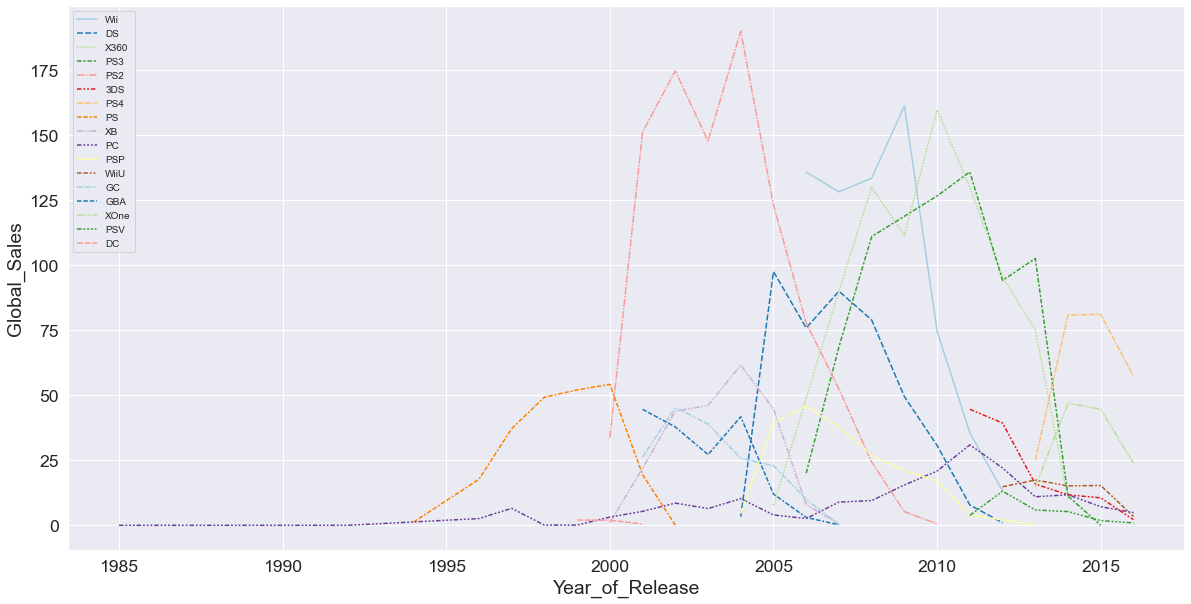

In [28]:
df2=df.copy();
sns.set(font_scale=1.6)
plt.figure(figsize=(20, 10))
plot = sns.lineplot(df2, x='Year_of_Release', y='Global_Sales', hue='Platform', style="Platform", estimator =sum, errorbar=None,palette = "Paired")
plt.setp(plot.get_legend().get_texts(), fontsize='8') 
plot.legend(loc = 2, prop={'size':10})
plt.show()


In [37]:
dfcopy= df.copy()
dfWii = dfcopy[dfcopy['Platform'] == "Wii"]
print("Wii Latest year:"+str(dfWii['Year_of_Release'].max()))
dfDS = dfcopy[dfcopy['Platform'] == "DS"]
print("DS Latest year:"+str(dfDS['Year_of_Release'].max()))
dfX360 = dfcopy[dfcopy['Platform'] == "X360"]
print("X360 Latest year:"+str(dfX360['Year_of_Release'].max()))
dfPS3 = dfcopy[dfcopy['Platform'] == "PS3"]
print("PS3 Latest year:"+str(dfPS3['Year_of_Release'].max()))
dfPS2 = dfcopy[dfcopy['Platform'] == "PS2"]
print("PS2 Latest year:"+str(dfPS2['Year_of_Release'].max()))
df3DS = dfcopy[dfcopy['Platform'] == "3DS"]
print("3DS Latest year:"+str(df3DS['Year_of_Release'].max()))
dfPS4 = dfcopy[dfcopy['Platform'] == "PS4"]
print("PS4 Latest year:"+str(dfPS4['Year_of_Release'].max()))
dfPS = dfcopy[dfcopy['Platform'] == "PS"]
print("PS Latest year:"+str(dfPS['Year_of_Release'].max()))
dfXB = dfcopy[dfcopy['Platform'] == "XB"]
print("XB Latest year:"+str(dfXB['Year_of_Release'].max()))
dfPC = dfcopy[dfcopy['Platform'] == "PC"]
print("PC Latest year:"+str(dfPC['Year_of_Release'].max()))
dfPSP = dfcopy[dfcopy['Platform'] == "PSP"]
print("PSP Latest year:"+str(dfPSP['Year_of_Release'].max()))
dfWiiU = dfcopy[dfcopy['Platform'] == "WiiU"]
print("WiiU Latest year:"+str(dfWiiU['Year_of_Release'].max()))
dfGC = dfcopy[dfcopy['Platform'] == "GC"]
print("GC Latest year:"+str(dfGC['Year_of_Release'].max()))
dfGBA = dfcopy[dfcopy['Platform'] == "GBA"]
print("GBA Latest year:"+str(dfGBA['Year_of_Release'].max()))
dfXOne = dfcopy[dfcopy['Platform'] == "XOne"]
print("XOne Latest year:"+str(dfXOne['Year_of_Release'].max()))
dfPSV = dfcopy[dfcopy['Platform'] == "PSV"]
print("PSV Latest year:"+str(dfPSV['Year_of_Release'].max()))
dfDC = dfcopy[dfcopy['Platform'] == "DC"]
print("DC Latest year:"+str(dfDC['Year_of_Release'].max()))

Wii Latest year:2012.0
DS Latest year:2012.0
X360 Latest year:2014.0
PS3 Latest year:2015.0
PS2 Latest year:2010.0
3DS Latest year:2016.0
PS4 Latest year:2016.0
PS Latest year:2002.0
XB Latest year:2007.0
PC Latest year:2016.0
PSP Latest year:2013.0
WiiU Latest year:2016.0
GC Latest year:2007.0
GBA Latest year:2007.0
XOne Latest year:2016.0
PSV Latest year:2016.0
DC Latest year:2001.0


The graph shows that the global sale for every platform, is decreasing. 
The games that had the highest peak was PS2 but the popularity have decreased at its almost zero in 2010. 
Now PS4 has the highest peak in 2015 and it makes sense because PS4 is the newest platform out of all. We can see that a lot of plaforms have been outdated a while ago which leads to a decreasing trend for each platform. 
